In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


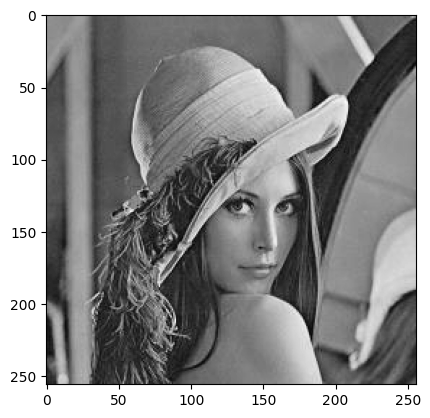

In [4]:
img = cv2.imread('/content/drive/MyDrive/colabp/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

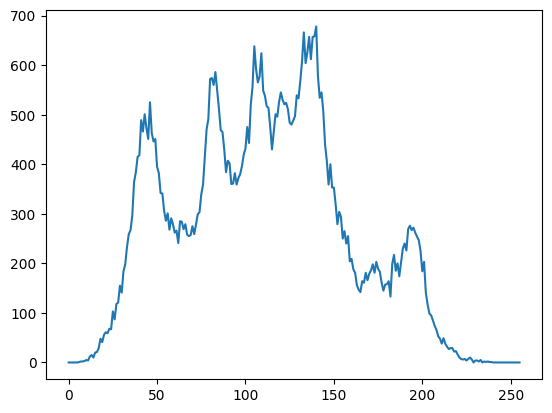

In [5]:
hist =cv2.calcHist([gImg],[0],None,[256],[0,256])
plt.plot(hist)
#

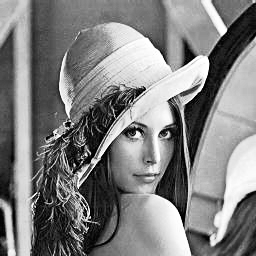

In [6]:
gOut =cv2.equalizeHist(gImg)
cv2_imshow(gOut)

(256, 1)


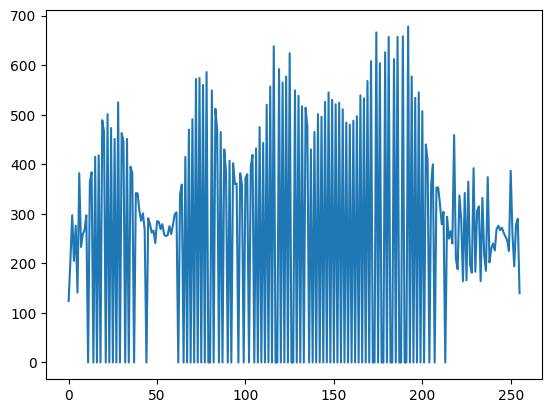

In [11]:
hist =cv2.calcHist([gOut],[0],None,[256],[0,256])
plt.plot(hist)
print(hist.shape)

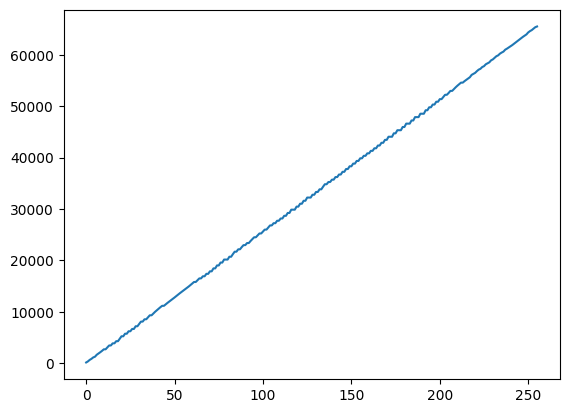

In [28]:
cumulHist = hist.copy()
for i in range(1,256):
    cumulHist[i] = cumulHist[i-1]+hist[i]
plt.plot(cumulHist)

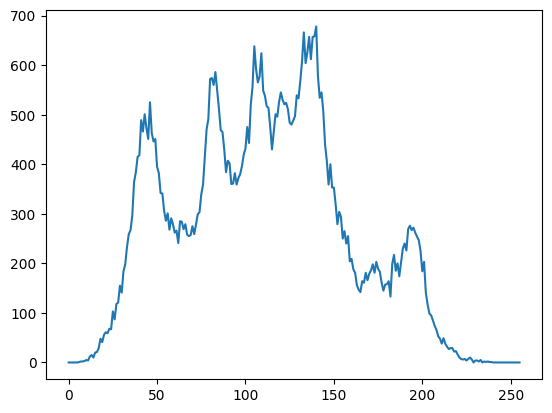

In [33]:
hist =cv2.calcHist([gImg],[0],None,[256],[0,256])
plt.plot(hist)

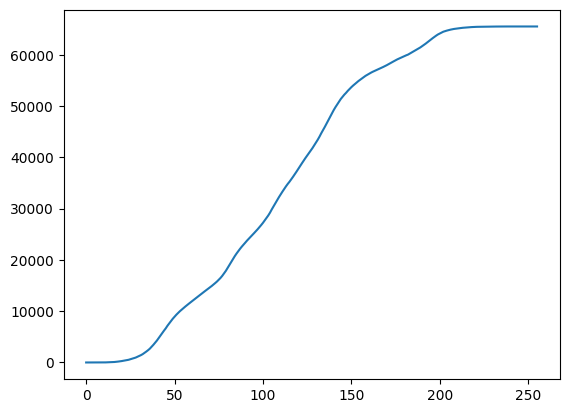

In [34]:
cumulHist = hist.copy()
for i in range(1,256):
    cumulHist[i] = cumulHist[i-1]+ hist[i]
plt.plot(cumulHist)

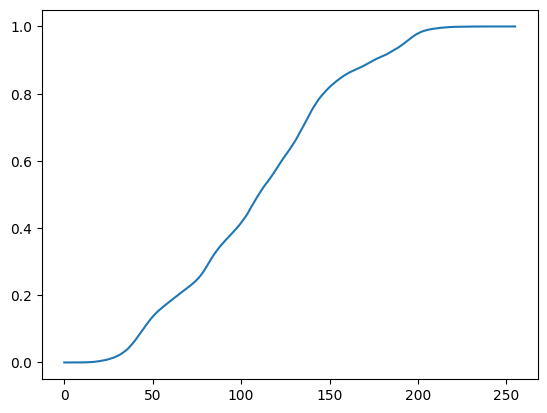

In [35]:
equalHist =cumulHist.copy()
numOfpixels = np.int32(gImg.shape[0]*gImg.shape[1])
equalHist = equalHist/numOfpixels
plt.plot(equalHist)

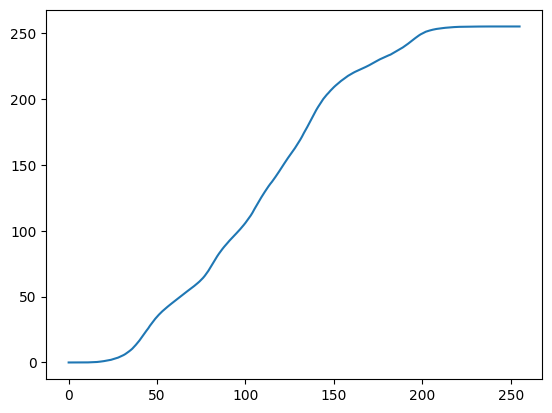

In [36]:
equalHist = equalHist *255
plt.plot(equalHist)


<ipython-input-37-a1fa29b5cc02>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h,w] = equalHist[gImg[h,w]]


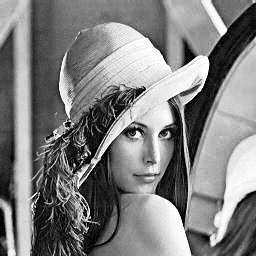

In [37]:
gOut = gImg.copy()
for h in range(gImg.shape[0]):
    for w in range(gImg.shape[1]):
        gOut[h,w] = equalHist[gImg[h,w]]
cv2_imshow(gOut)